# Analysis Demonstration

### (things to talk about: how we ran analysis and gathered data, problems we ran into and how to solve them, how our functions could be used, things that surprised us, interesting conclusions, etc)

## Import Functions

In [1]:
# Packages
import pandas as pd
import numpy as np
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter

# Our Functions
from scrape_data import scrape_imdb, scrape_rotten_tomatoes, get_html_text
from clean_data import clean_imdb, clean_rotten_tomatoes
from analysis_functions import list_averages



## Use Our Functions to Scrape and Clean Data
Our functions allow you to scrape data from imdb and rotten tomatoes lists of movies. The two lists we are using for our data are https://editorial.rottentomatoes.com/guide/disney-100-essential-movies/ and https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=1 which goes on to have five pages of disney movies. After scraping we create a csv file of the raw data which we then pass to our cleaning functions. The raw data as well as the final cleaned datasets are included in the data folder.

In [2]:
# Scrape from Rotten Tomatoes

webpage = "https://editorial.rottentomatoes.com/guide/disney-100-essential-movies/"
rotten_tomatoes = scrape_rotten_tomatoes(webpage)
rotten_tomatoes.to_csv('data/rotten_tomatoes_raw.csv', index = False)

c:\Users\Daisy Harris\Desktop\Stat_386\Movies\disney_movie_analysis\scrape_data.py:42: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 42 of the file c:\Users\Daisy Harris\Desktop\Stat_386\Movies\disney_movie_analysis\scrape_data.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(r.text)


In [4]:
# Scrape from IMDB

webpages = ["https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=1", 
            "https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=2",
            "https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=3", 
            "https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=4",
            "https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=5"]

imdb = pd.DataFrame()
for webpage in webpages:
    imdb = pd.concat([imdb, scrape_imdb(webpage)])

imdb.to_csv('data/imdb_raw.csv', index = False)

c:\Users\Daisy Harris\Desktop\Stat_386\Movies\disney_movie_analysis\scrape_data.py:71: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 71 of the file c:\Users\Daisy Harris\Desktop\Stat_386\Movies\disney_movie_analysis\scrape_data.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(r.text)


In [5]:
# Clean Rotten Tomatoes Dataframe

rotten_tomatoes = pd.read_csv('data/rotten_tomatoes_raw.csv')

rotten_tomatoes = clean_rotten_tomatoes(rotten_tomatoes)

rotten_tomatoes.to_csv('data/rotten_tomatoes.csv', index = False)

In [7]:
# Clean IMDB Dataframe

imdb = pd.read_csv('data/imdb_raw.csv')

# Drop 19 since it has no reviews or data aside from name
imdb = imdb.drop(19, axis='index')

# Drop 170 since it is a DVD containing episodes from different shows and not a movie
imdb = imdb.drop(170, axis='index')

imdb = clean_imdb(imdb)

imdb.to_csv('data/imdb.csv', index = False)

We can then merge the two datasets to run comparisons.

In [9]:
merged = rotten_tomatoes.merge(imdb, how= 'inner', on = ['title', 'year'])
merged.to_csv('data/merged.csv', index = False)

Below we utilize our list_averages function to get the average score for each director included in the directors column. Here we look at the top 20 directors.

In [10]:
item_count = imdb['director'].apply(lambda x: Counter(x))
top_directors = pd.DataFrame(sum(item_count, Counter()).most_common(20))


director_scores = list_averages(imdb, imdb['director'], imdb['score'])
top_scores = director_scores[director_scores[0].isin(list(top_directors[0]))]

top_directors.merge(top_scores, 'outer', on = [0])

,0,1_x,1_y
0,Robert Stevenson,18,6.4889
1,Norman Tokar,14,6.3571
2,Vincent McEveety,13,5.7692
3,Hamilton Luske,12,6.9750
4,James Algar,11,7.0364
5,Clyde Geronimi,11,6.9364
6,Jack Kinney,10,6.7900
7,Wilfred Jackson,9,7.2556
8,Ron Clements,7,7.4143
9,John Musker,7,7.4143


We use the same function to compute ratings for each genre. And then compare the genre ratings between imdb and rotten tomatoes.

In [11]:
genre_ratings = list_averages(imdb, imdb['genre'], imdb['score'])
genre_ratings.sort_values(by = 1)

,0,1
13,Crime,5.7250
15,Music,5.7556
14,Western,5.9444
20,Horror,6.1000
2,Comedy,6.1594
5,Family,6.1809
18,Romance,6.2125
6,Fantasy,6.3776
21,War,6.4000
7,Drama,6.4014


In [12]:
merged['genre'] = merged['genre'].apply(lambda x: x.replace(', ', ',')).str.split(',')
genre_ratings2 = list_averages(merged, merged['genre'], merged['score_y'])
genre_ratings2.sort_values(by = 1)

,0,1
11,Sci-Fi,6.7000
9,Mystery,6.9000
10,History,6.9000
4,Family,7.0711
6,Fantasy,7.1000
12,Romance,7.2000
5,Drama,7.2296
8,Sport,7.2750
2,Adventure,7.3500
3,Comedy,7.3918


In [13]:
genre_ratings3 = list_averages(merged, merged['genre'], merged['comparison_score'])
genre_ratings3[1] = genre_ratings3[1].astype(float)
genre_ratings3.sort_values(by = 1)

,0,1
10,History,3.9000
9,Mystery,4.6000
11,Sci-Fi,7.3000
6,Fantasy,7.6846
7,Biography,7.9200
4,Family,7.9711
8,Sport,8.0500
5,Drama,8.0593
1,Action,8.1222
2,Adventure,8.4583


Continuing our comparisons, we can look at the average score for rotten tomatoes and for IMDB.

In [16]:
print("IMDB Score: ")
print(merged.score_y.mean())
print("Rotten Tomatoes Score: ")
print(merged.comparison_score.mean())

IMDB Score: 
7.3311827956989255
Rotten Tomatoes Score: 
8.375268817204303


Here is the score by decade for IMDB.

In [17]:
merged.groupby(merged['decade']).score_y.mean()

decade
1930    7.600000
1940    7.425000
1950    7.257143
1960    7.366667
1970    7.050000
1980    6.983333
1990    7.325000
2000    7.440000
2010    7.336364
2020    7.566667
Name: score_y, dtype: float64

And here is the same for Rotten Tomatoes.

In [18]:
merged.groupby(merged['decade']).comparison_score.mean()

decade
1930    9.700000
1940    9.525000
1950    9.014286
1960    8.500000
1970    7.750000
1980    7.916667
1990    7.970000
2000    8.520000
2010    8.231818
2020    9.200000
Name: comparison_score, dtype: float64

And finally a graphical comparison.

Text(0.5, 1.0, '')

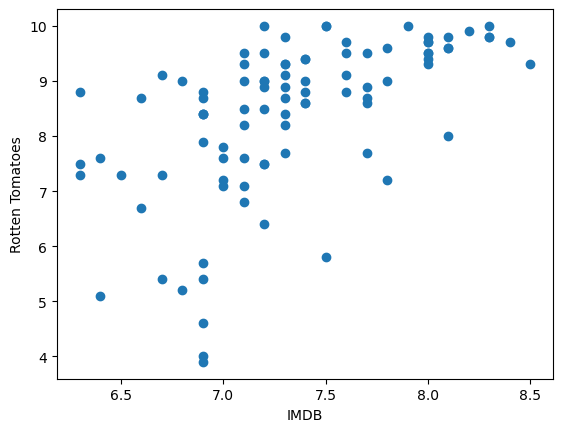

In [19]:
plt.scatter(merged.score_y, merged.comparison_score) 
plt.xlabel('IMDB')
plt.ylabel('Rotten Tomatoes')
plt.title('')

Another object of interest is the scores by movie rating.

In [20]:
imdb.groupby(imdb['rating']).score.mean()

rating
Approved     6.587805
G            6.416201
Not Rated    6.017647
PG           6.341875
PG-13        7.122222
Passed       6.350000
TV-G         5.728205
TV-PG        6.066667
Unrated      6.020000
Name: score, dtype: float64

We can also look at trends over the years in the following graphs.

Text(0.5, 1.0, 'Average Gross By Year')

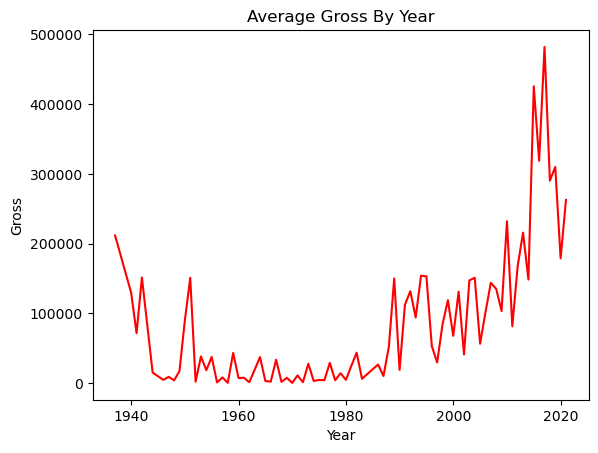

In [21]:
plt.plot(imdb.groupby(imdb['year']).gross.mean(),  'r') 
plt.xlabel('Year')
plt.ylabel('Gross')
plt.title('Average Gross By Year')

Text(0.5, 1.0, 'Average Runtime By Year')

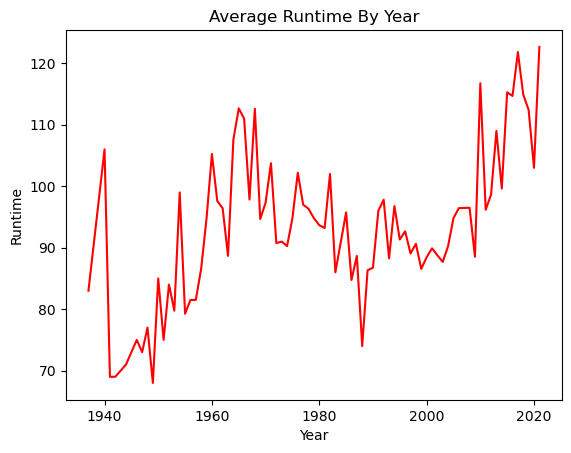

In [22]:
plt.plot(imdb.groupby(imdb['year']).runtime.mean(),  'r') 
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.title('Average Runtime By Year')

Text(0.5, 1.0, 'Average IMDB Score By Year')

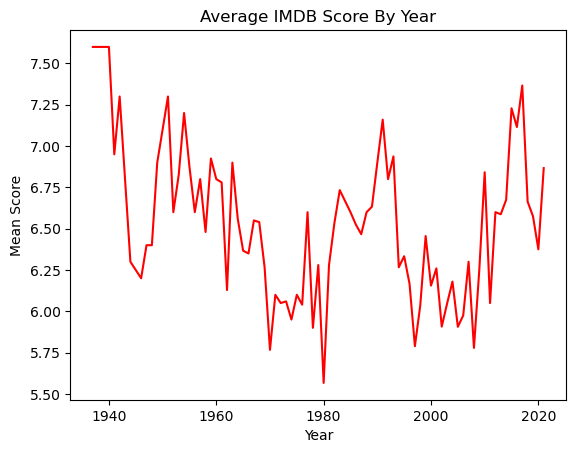

In [23]:
plt.plot(imdb.groupby(imdb['year']).score.mean(),  'r') 
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.title('Average IMDB Score By Year')

And finally the complete pairplot.

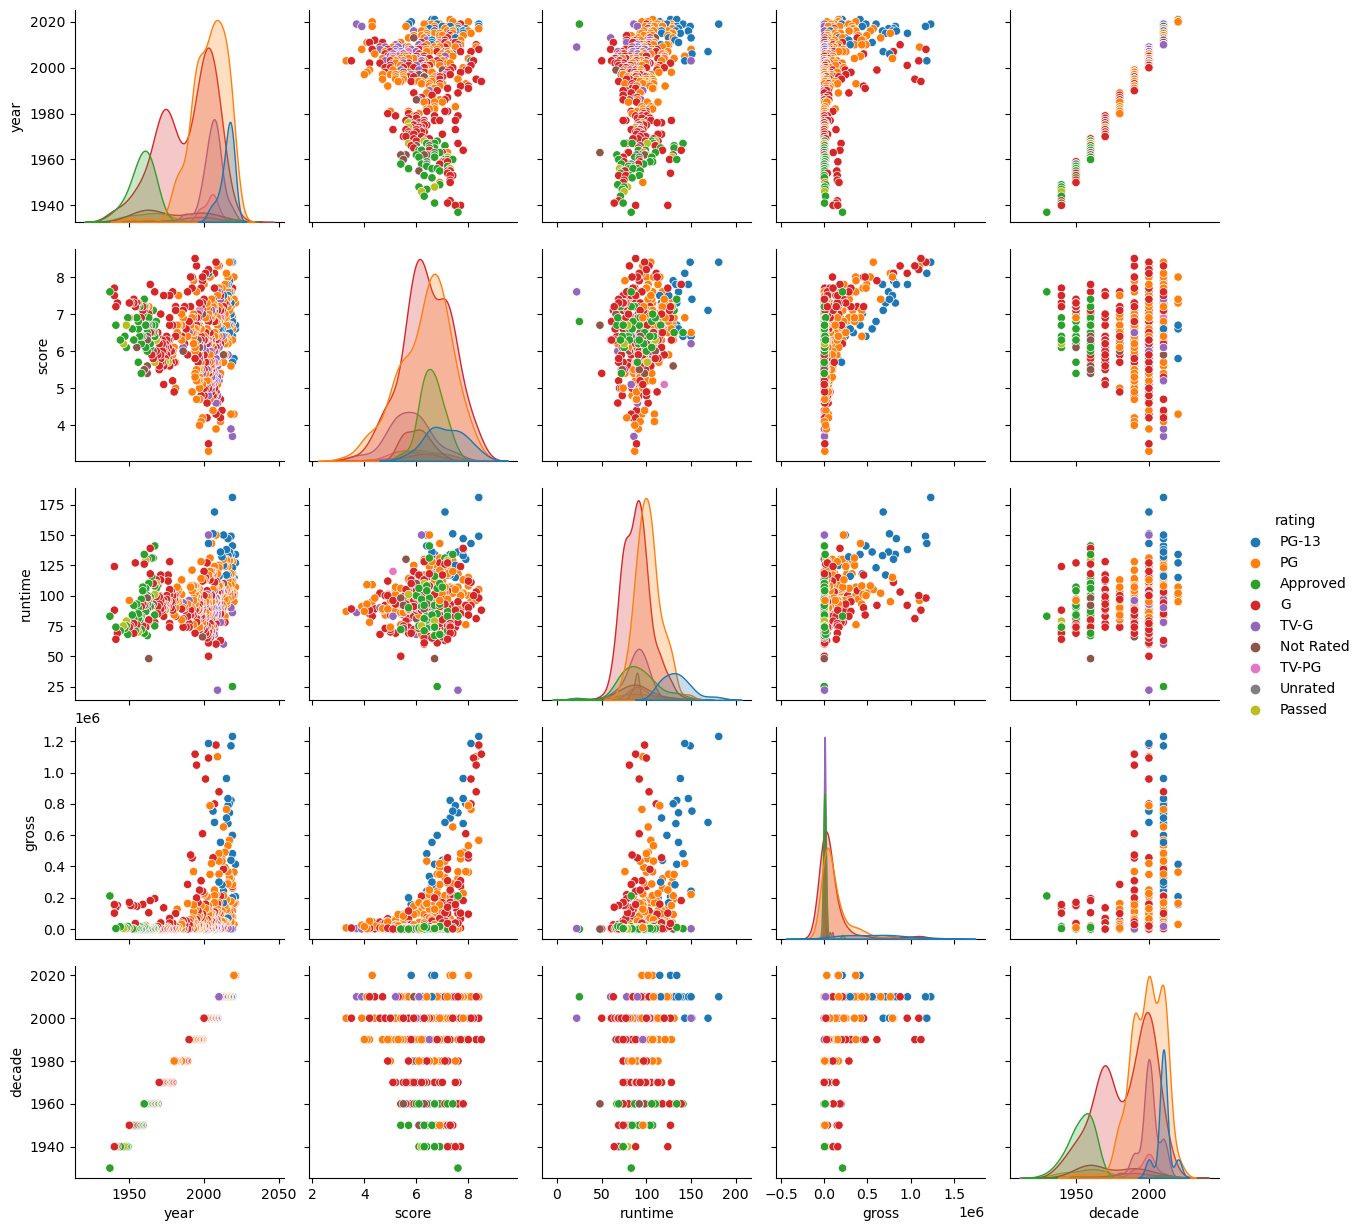

In [24]:
sns.pairplot(imdb, hue = 'rating')